C:\Users\tom77\AppData\Local\Temp\ipykernel_17664\973776531.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


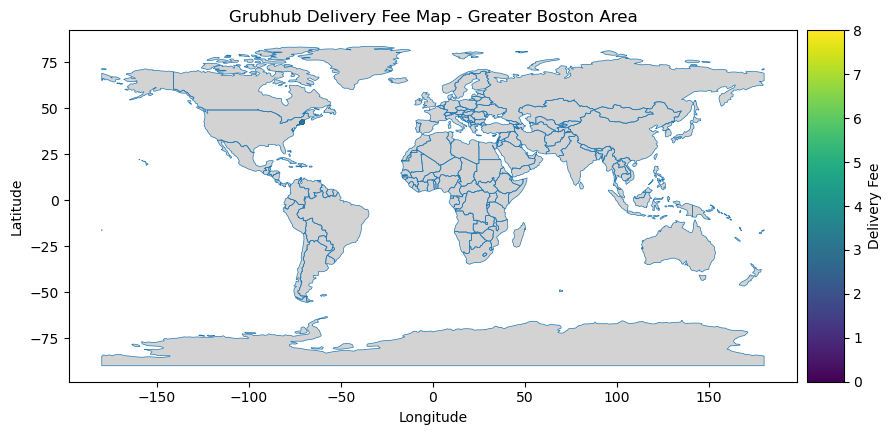

In [26]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('grubhub.csv')

# Filter data for Greater Boston area
greater_boston_bbox = (-71.3, 42.1, -70.9, 42.5)
df = df[(df['searched_lng'] >= greater_boston_bbox[0]) & (df['searched_lng'] <= greater_boston_bbox[2]) &
        (df['searched_lat'] >= greater_boston_bbox[1]) & (df['searched_lat'] <= greater_boston_bbox[3])]

# Convert DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['searched_lng'], df['searched_lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Load a basemap for background
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot basemap
world.boundary.plot(ax=ax, linewidth=0.5)
world.plot(ax=ax, color='lightgray')

# Plot the points with color mapped to delivery fee
gdf.plot(ax=ax, column='delivery_fee', legend=True, legend_kwds={'label': "Delivery Fee"}, cax=cax,
         cmap='viridis', markersize=5)

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Grubhub Delivery Fee Map - Greater Boston Area')

# Show plot
plt.show()



In [24]:
!pip install mplleaflet

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28574 sha256=e76e210f90ecf0ed61f638a15d28bf9c6829e3b6be82d3e8bcf6a4dd863602b1
  Stored in directory: c:\users\tom77\appdata\local\pip\cache\wheels\19\d8\76\c40290202e76c98889c67d6c21fe5e7057334b088e21ef88ba
Successfully built mplleaflet
